This project aims at practicing text cleaning techniques for NLP prep.

## Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import feature_extraction,linear_model, model_selection, preprocessing
import nltk
import nltk as nlp
import string
import re
import spacy
from spacy import displacy
from spacy.util import minibatch, compounding

In [2]:
data = pd.read_csv('train.csv', encoding='utf-8')
true = pd.read_csv('True.csv')
news = pd.read_csv('news.csv')

In [3]:
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
news.head()

,Unnamed: 0,authors,title,publish_date,description,text,url
0,0,[],'More vital now:' Gay-straight alliances go vi...,2020-05-03 1:30,Lily Overacker and Laurell Pallot start each g...,Lily Overacker and Laurell Pallot start each g...,https://www.cbc.ca/news/canada/calgary/gay-str...
1,1,[],Scientists aim to 'see' invisible transmission...,2020-05-02 8:00,Some researchers aim to learn more about how t...,"This is an excerpt from Second Opinion, a week...",https://www.cbc.ca/news/technology/droplet-tra...
2,2,['The Canadian Press'],Coronavirus: What's happening in Canada and ar...,2020-05-02 11:28,Canada's chief public health officer struck an...,The latest: The lives behind the numbers: Wha...,https://www.cbc.ca/news/canada/coronavirus-cov...
3,3,[],"B.C. announces 26 new coronavirus cases, new c...",2020-05-02 18:45,B.C. provincial health officer Dr. Bonnie Henr...,B.C. provincial health officer Dr. Bonnie Henr...,https://www.cbc.ca/news/canada/british-columbi...
4,4,[],"B.C. announces 26 new coronavirus cases, new c...",2020-05-02 18:45,B.C. provincial health officer Dr. Bonnie Henr...,B.C. provincial health officer Dr. Bonnie Henr...,https://www.cbc.ca/news/canada/british-columbi...


## Word Cloud

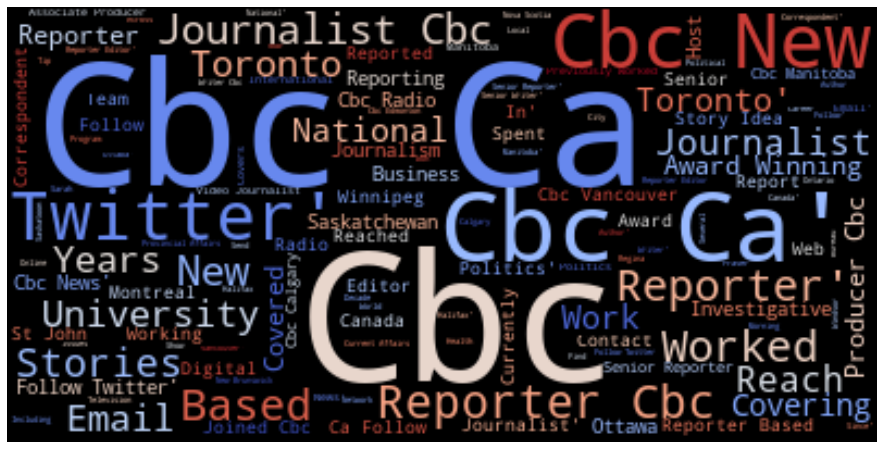

In [6]:
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(each) for each in news.authors.unique())
wordcloud = WordCloud(max_words=200, background_color="black", colormap="coolwarm").generate(text)
plt.figure(figsize=(16,8))
plt.imshow(wordcloud, interpolation='Bilinear')
plt.axis('off')
plt.show()

## Split Text

In [11]:
split(news['description'][0])

['Lily',
 'Overacker',
 'and',
 'Laurell',
 'Pallot',
 'start',
 'each',
 'gay-straight',
 'alliance',
 'meeting',
 'with',
 'everyone',
 'introducing',
 'themselves,',
 'saying',
 'their',
 'pronouns',
 'and',
 'sharing',
 'highs',
 'and',
 'lows',
 'of',
 'the',
 'week.']

In [13]:
data['split_text'] = data['text'].apply(lambda x: x.split())
data.head(1)

,id,keyword,location,text,target,split_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,"[Our, Deeds, are, the, Reason, of, this, #eart..."


## Lower/Upper Case

In [16]:
text_lower = data['text'][0].lower().split()
text_lower

['our',
 'deeds',
 'are',
 'the',
 'reason',
 'of',
 'this',
 '#earthquake',
 'may',
 'allah',
 'forgive',
 'us',
 'all']

In [17]:
text_upper = data['text'][0].upper().split()
text_upper

['OUR',
 'DEEDS',
 'ARE',
 'THE',
 'REASON',
 'OF',
 'THIS',
 '#EARTHQUAKE',
 'MAY',
 'ALLAH',
 'FORGIVE',
 'US',
 'ALL']

## Unique Words

In [22]:
true['title_uniq'] = true['title'].apply(lambda x: set(x.lower().split()))
true[['title','title_uniq']].head(5)

,title,title_uniq
0,"As U.S. budget fight looms, Republicans flip t...","{script, flip, their, fiscal, looms,, budget, ..."
1,U.S. military to accept transgender recruits o...,"{recruits, monday:, accept, on, military, to, ..."
2,Senior U.S. Republican senator: 'Let Mr. Muell...,"{republican, do, mr., senior, senator:, muelle..."
3,FBI Russia probe helped by Australian diplomat...,"{tip-off:, probe, by, diplomat, russia, nyt, f..."
4,Trump wants Postal Service to charge 'much mor...,"{postal, shipments, wants, service, to, for, t..."


## Remove Punctuations

In [23]:
def remove_punct(text):
    text = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+','', text)
    return text

true['title_punct_removed'] = true['title'].apply(lambda x: remove_punct(x))
true[['title','title_punct_removed']].head(5)

,title,title_punct_removed
0,"As U.S. budget fight looms, Republicans flip t...",As US budget fight looms Republicans flip thei...
1,U.S. military to accept transgender recruits o...,US military to accept transgender recruits on ...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,Senior US Republican senator Let Mr Mueller do...
3,FBI Russia probe helped by Australian diplomat...,FBI Russia probe helped by Australian diplomat...
4,Trump wants Postal Service to charge 'much mor...,Trump wants Postal Service to charge much more...


## Remove Numbers

In [24]:
def remove_num (text):
    text = ''.join([i for i in text if not i.isdigit()])
    return text

remove_num('My dog Romeo is 3 years old and weighs 75 pounds')

'My dog Romeo is  years old and weighs  pounds'

## Remove URLs

In [25]:
def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

remove_url("Kaggle id https://www.kaggle.com/mattxushuai")

'Kaggle id '

## Remove HTML tags

In [26]:
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)
remove_html("<h1>Matt Xu</h1>")

'Matt Xu'

## Remove Emoji

In [27]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

remove_emoji("Sad😔")

'Sad'

## Remove Stop Words

In [30]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

def clean_stopwords(text):
    stop_words = set(stopwords.words('english'))
    filtered_text = [w for w in word_tokenize(text) if w not in stop_words]
    return filtered_text

print(data['text'][0])
print(clean_stopwords(data['text'][0]))

Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all
['Our', 'Deeds', 'Reason', '#', 'earthquake', 'May', 'ALLAH', 'Forgive', 'us']


## Stemming

In [32]:
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize 
   
ps = PorterStemmer() 
   
sentence = "Programers program with programing languages"
words = word_tokenize(sentence) 
   
for w in words: 
    print(w, " : ", ps.stem(w)) 

Programers  :  program
program  :  program
with  :  with
programing  :  program
languages  :  languag


## Lemmatization

In [34]:
text = "rocks corpora better"
text = text.split()
lemma = nlp.WordNetLemmatizer()
lemma_roots = [lemma.lemmatize(each) for each in text]
print(lemma_roots)

['rock', 'corpus', 'better']


## Vectorization

In [35]:
count = feature_extraction.text.CountVectorizer()
train_vectors = count.fit_transform(data["text"][0:2])
print(train_vectors[0].todense())
print(train_vectors[1].todense())

[[1 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0 0 1 1 1]]
[[0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0]]
